**TASK 1: Titanic Survival Prediction**

Predict whether a passenger Survived (1) or Not Survived (0) using simple features

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Load DataSet

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Handle Missing Values

In [4]:
titanic['age'].fillna(titanic['age'].median(), inplace = True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2532218145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace = True)
/tmp/ipython-input-2532218145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Convert Text to Numbers
- Machine Learning models only understand numbers, not words.

In [5]:
encoder = LabelEncoder()
titanic['sex'] = encoder.fit_transform(titanic['sex'])
titanic['embarked'] = encoder.fit_transform(titanic['embarked'])

Select Input & Output
- X → features (inputs)
- y → target (what we want to predict)

In [6]:
X = titanic[['pclass', 'sex', 'age', 'fare']]
y = titanic['survived']

Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

Train the Model

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Prediction and Accuracy

In [9]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.8044692737430168


Analysis

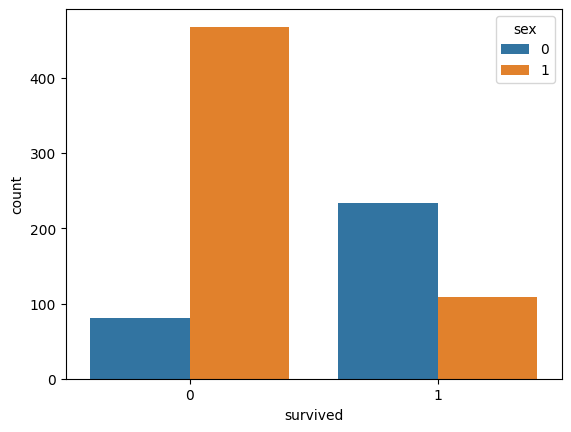

In [10]:
sns.countplot(x='survived', hue='sex', data=titanic)
plt.show()